In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
raw_data = pd.read_csv(r"C:\Users\Su Te\Downloads\train.csv")

In [8]:
numdata = pd.DataFrame(raw_data[['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'SalePrice']])

In [9]:
numdata.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
0,8450,1710,856,548,208500
1,9600,1262,1262,460,181500
2,11250,1786,920,608,223500
3,9550,1717,756,642,140000
4,14260,2198,1145,836,250000


0 LotArea
LotArea skew =  12.207687851233496
1 GrLivArea
GrLivArea skew =  1.3665603560164552
2 TotalBsmtSF
TotalBsmtSF skew =  1.5242545490627664
3 GarageArea
GarageArea skew =  0.17998090674623907
4 SalePrice
SalePrice skew =  1.8828757597682129


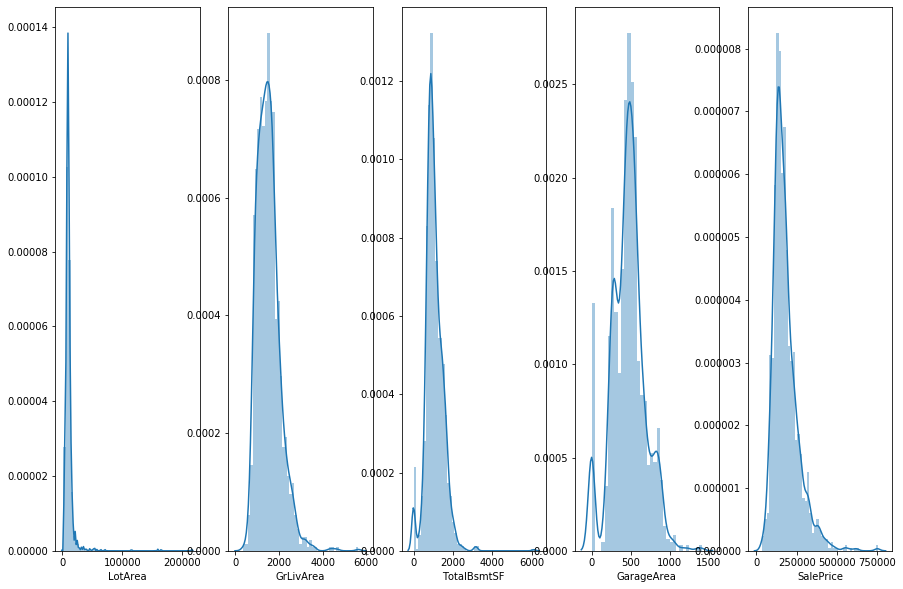

In [45]:

fig, ax =plt.subplots(1,5,figsize=(15,10))
for count,col in enumerate(numdata):
    print(count,col)
    sb.distplot(numdata[col],ax=ax[count])
    print(col,"skew = ",numdata[col].skew())


In [51]:
jointdf=pd.concat([numdata.LotArea,
                   numdata.GrLivArea,
                   numdata.TotalBsmtSF,
                   numdata.GarageArea,
                   numdata.SalePrice],sort =False,axis=1)

In [52]:
jointdf.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.260833,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.454868,0.468997,0.708624
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665,0.613581
GarageArea,0.180403,0.468997,0.486665,1.000000,0.623431
SalePrice,0.263843,0.708624,0.613581,0.623431,1.000000


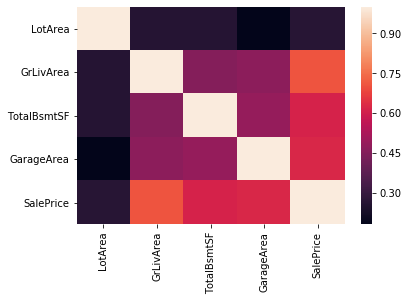

In [54]:
sb.heatmap(jointdf.corr())

In [56]:
catdata = pd.DataFrame(raw_data[['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']])

In [57]:
catdata.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [60]:
catdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
MSSubClass      1460 non-null int64
Neighborhood    1460 non-null object
BldgType        1460 non-null object
OverallQual     1460 non-null int64
dtypes: int64(2), object(2)
memory usage: 45.7+ KB


In [64]:
unique_counts = pd.DataFrame.from_records([(col, catdata[col].nunique()) for col in catdata.columns],
                          columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

,Column_Name,Num_Unique
2,BldgType,5
3,OverallQual,10
0,MSSubClass,15
1,Neighborhood,25


In [71]:
pd.DataFrame([col,catdata[col].nunique() for col in catdata.columns])

SyntaxError: invalid syntax (<ipython-input-71-c0e932681d4d>, line 1)